In [35]:
import pandas as pd

df_raw = pd.read_csv("../data/messy_strings.csv")

print(df_raw)

             raw
0           BOB(
1        dana~  
2          {EVE/
3      "ALICE   
4            BOB
5           DANA
6        CHARLIE
7       alice   
8          FRANK
9            bob
10           eve
11        \dana'
12           EVE
13      CHARLIE 
14          -eve
15        bob   
16           EVE
17     .FRANK   
18          eve 
19           EVE
20          BOB&
21      charlie"
22    ,charlie  
23         EVE  
24         ]dana
25     charlie  
26        alice+
27         EVE{ 
28          DANA
29       frank  
30      CHARLIE!
31      |ALICE# 
32           BOB
33        frank^
34         alice
35          'bob
36       CHARLIE
37         eve+ 
38      CHARLIE 
39       charlie
40         dana#
41       DANA   
42          dana
43       CHARLIE
44    =charlie! 
45        bob   
46           bob
47       ;EVE   
48    =charlie  
49          dana


In [36]:
import re, string

def clean_strings(strings):
    strings = strings.dropna()
    strings = strings.astype(str)
    strings = strings.str.strip()
    strings = strings.str.lower()
    strings.str.replace(re.escape(string.punctuation), "")
    return strings

In [37]:
df_clean = pd.DataFrame()
df_clean['clean'] = clean_strings(df_raw['raw'])

print(df_clean)

        clean
0        bob(
1       dana~
2       {eve/
3      "alice
4         bob
5        dana
6     charlie
7       alice
8       frank
9         bob
10        eve
11     \dana'
12        eve
13    charlie
14       -eve
15        bob
16        eve
17     .frank
18        eve
19        eve
20       bob&
21   charlie"
22   ,charlie
23        eve
24      ]dana
25    charlie
26     alice+
27       eve{
28       dana
29      frank
30   charlie!
31    |alice#
32        bob
33     frank^
34      alice
35       'bob
36    charlie
37       eve+
38    charlie
39    charlie
40      dana#
41       dana
42       dana
43    charlie
44  =charlie!
45        bob
46        bob
47       ;eve
48   =charlie
49       dana


In [38]:
print("Statistics for cleaned data")
print("-------")
print(f"Total Rows: {len(df_clean)}")
unique = df_clean.nunique()
print(f"Unique Counts: {unique['clean']}")
counts = df_clean["clean"].value_counts()
print(f"Most Common String: {counts.index[0]}")

Statistics for cleaned data
-------
Total Rows: 50
Unique Counts: 28
Most Common String: charlie


In [39]:
df_clean.to_csv('../data/messy_strings_clean.csv', index=False)

<Axes: xlabel='clean'>

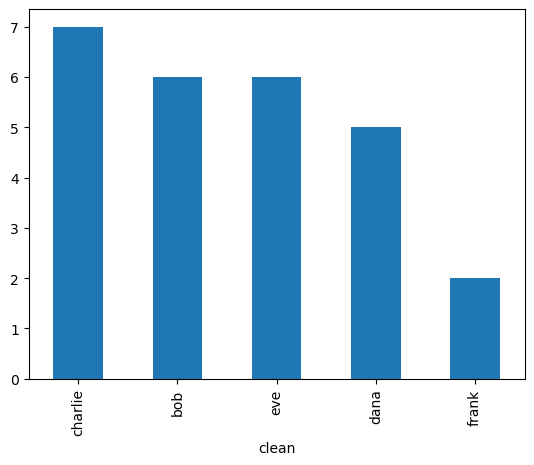

In [40]:
df_clean['clean'].value_counts().head(5).plot.bar()